In [1]:
# imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import sequencer

In [9]:
# get data from file
data = np.loadtxt("Filtered_Flux_Grid_phase_dm15_1.03.txt", dtype=str)        

In [10]:
print(len(data))

111


In [11]:
np.shape(data)

(111, 1625)

In [12]:
# convert str in data to float
for x in range(0,len(data)):
    for y in range(0, len(data[x])):
        if data[x,y] == 'None':
            data[x,y] = 0
data = data.astype(float)

#offset to make sequencer work (to remove, -100 & /100)
offset_data = data *100+100
print(offset_data)

[[149.50081139 150.90217954 151.17626012 ... 121.75332093 121.61477988
  121.26706531]
 [140.32593831 142.32568927 142.91943359 ... 130.84555671 130.98163866
  131.12197985]
 [198.42388728 198.93500731 197.74042781 ... 110.08864327 110.32475949
  110.47745152]
 ...
 [194.52111021 192.23241775 190.97294079 ... 113.94411051 113.73508538
  113.66960797]
 [155.76484571 155.68585839 154.89486686 ... 119.28924135 119.68617696
  118.78379072]
 [134.21424874 132.00335739 135.68567156 ... 128.66277332 129.63364736
  129.2000871 ]]


In [4]:
for x in range(0,139):
    for y in range(0, len(data[x])):
        if data[x][y]<= 0:
            #xaxis = np.arange(1645)
            #fig, ax = plt.subplots(2,1)
            #ax[0].plot(xaxis, data[x])
            #ax[1].plot(xaxis, data[x])
            #plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-4-f88f3b87225e>, line 8)

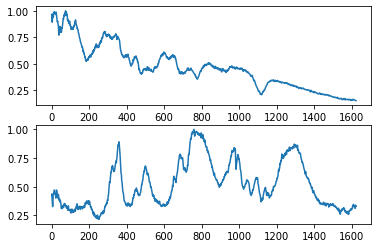

In [18]:
# plotting two graphs

xaxis = np.arange(len(data[0]))
fig, ax = plt.subplots(2,1)
ax[0].plot(xaxis, data[15])
ax[1].plot(xaxis, data[100])
plt.show()

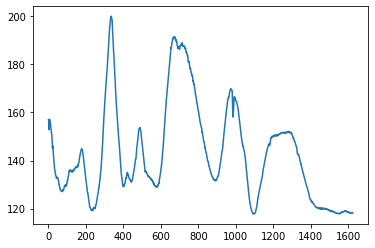

In [19]:
# plotting main test graph
xaxis = np.arange(len(data[0]))
plt.plot(xaxis, offset_data[20])
plt.show()

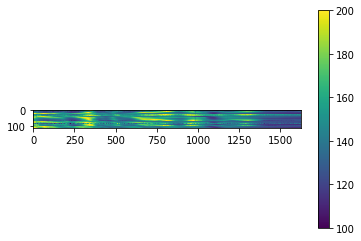

In [17]:
#plotting other different colorbar
plt.imshow(offset_data)
plt.clim(100, 200)
plt.colorbar()

Sequencer Code:

In [20]:
x = np.linspace(3926.0, 7174.0, num=len(data[0]))
print(x)

[3926. 3928. 3930. ... 7170. 7172. 7174.]


In [21]:
indices = np.arange(len(offset_data))
np.random.shuffle(indices)

objects_list_shuffled = offset_data[indices]
grid = np.copy(x)

In [22]:
print(np.shape(grid))
print(np.shape(offset_data))

(1625,)
(111, 1625)


In [23]:
# define the list of distance metrics to consider.
# I don't include the KL-Divergence because the dataset contains zero values
estimator_list = ['EMD', 'energy', 'L2']

# define the sequencer object with default parameters
seq = sequencer.Sequencer(grid, offset_data, estimator_list)

# to execute the sequencer, we first need to define the output directory to which the different 
# outputs will be saved
output_path = "sequencer_output3"
final_elongation, final_sequence = seq.execute(output_path)

calculating the distance matrices for estimator: EMD, scale: 1
finished calculating this distance matrix list, it took: 8.240267038345337 seconds
calculating the distance matrices for estimator: EMD, scale: 2
finished calculating this distance matrix list, it took: 7.9239420890808105 seconds
calculating the distance matrices for estimator: EMD, scale: 4
finished calculating this distance matrix list, it took: 9.454251766204834 seconds
calculating the distance matrices for estimator: EMD, scale: 8
finished calculating this distance matrix list, it took: 19.149632930755615 seconds
calculating the distance matrices for estimator: EMD, scale: 16
finished calculating this distance matrix list, it took: 27.576303005218506 seconds
calculating the distance matrices for estimator: EMD, scale: 32
finished calculating this distance matrix list, it took: 54.31132507324219 seconds
calculating the distance matrices for estimator: EMD, scale: 64
finished calculating this distance matrix list, it took

/opt/anaconda3/lib/python3.7/site-packages/sequencer/sequencer_.py:1025: RuntimeWarning: divide by zero encountered in true_divide
  distance_matrix = 1.0 / proximity_matrix_copy


dumped the sparse distance matrix to the file: <_io.BufferedWriter name='sequencer_output3/sparse_distance_matrix.pkl'>
dumped the final sequences and elongation to the file: <_io.BufferedWriter name='sequencer_output3/final_products.pkl'>


In [24]:
# print all the metrics and scales, and examine the intermediate elongations
estimator_list, scale_list, elongation_list = seq.return_elongation_of_weighted_products_all_metrics_and_scales()

print("intermediate elongations for the different metrics and scales:")
for i in range(len(estimator_list)):
    print("metric=%s, scale=%s, elongation: %s" % (estimator_list[i], 
                                                   scale_list[i], 
                                                   np.round(elongation_list[i], 2)))

intermediate elongations for the different metrics and scales:
metric=EMD, scale=1, elongation: 28.45
metric=EMD, scale=2, elongation: 21.58
metric=EMD, scale=4, elongation: 21.58
metric=EMD, scale=8, elongation: 21.11
metric=EMD, scale=16, elongation: 20.17
metric=EMD, scale=32, elongation: 19.82
metric=EMD, scale=64, elongation: 18.98
metric=energy, scale=1, elongation: 29.4
metric=energy, scale=2, elongation: 25.84
metric=energy, scale=4, elongation: 19.26
metric=energy, scale=8, elongation: 23.99
metric=energy, scale=16, elongation: 24.27
metric=energy, scale=32, elongation: 18.79
metric=energy, scale=64, elongation: 15.64
metric=L2, scale=1, elongation: 22.06
metric=L2, scale=2, elongation: 23.72
metric=L2, scale=4, elongation: 21.2
metric=L2, scale=8, elongation: 20.36
metric=L2, scale=16, elongation: 20.58
metric=L2, scale=32, elongation: 14.03
metric=L2, scale=64, elongation: 13.25


In [25]:
print(final_sequence)

[ 16  43  17 101  45  46  44 102  24  75  74  73  25  72   7  86  71  10
  70 107  41  26  12 108  42  15  40  13   6  76  98  97  77  47  18  27
  49   2   4  48  78  50   3 103  51  52  53  54  55  56  57 104  80  19
  58  81 109  20  59  91   0  99  60   8  28  61  90  29  62  30  11   1
  82   5  31  21 110  93  79 100  32  14  83  88  33  92  87  64 105 106
  34  89  94  63  22  23  95  35  65  84  67  96  37  36   9  38  68  66
  39  69  85]


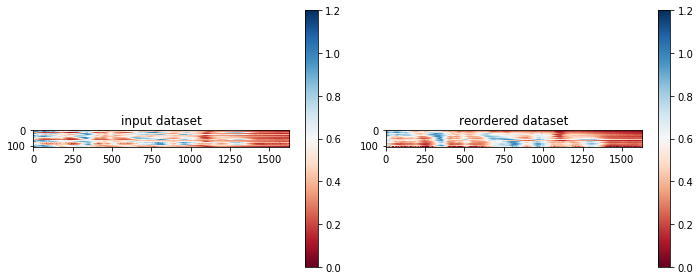

In [26]:
reordered_data = data[final_sequence, :]

plt.figure(1, figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("input dataset")
plt.imshow(data,cmap="RdBu")
plt.clim(0, 1.2)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("reordered dataset")
plt.imshow(reordered_data, cmap="RdBu")
plt.clim(0, 1.2)
plt.colorbar()

plt.tight_layout()

16 [0.88439699 0.87536986 0.8823676  ... 0.28770991 0.28913241 0.29007896]
43 [0.88392809 0.86148719 0.84356595 ... 0.26215167 0.25859425 0.2605548 ]
17 [0.87386648 0.86133089 0.82595704 ... 0.25191712 0.24971179 0.25368822]
101 [0.88247148 0.86890628 0.83581859 ... 0.27571842 0.27796496 0.28567879]
45 [0.89680493 0.88144042 0.86565114 ... 0.25430347 0.25278894 0.25642804]
46 [0.89750931 0.88320672 0.83986467 ... 0.27858916 0.27783683 0.27588369]
44 [0.84969639 0.85768855 0.83302433 ... 0.36883474 0.36497728 0.36467108]
102 [0.87387922 0.85794658 0.84101445 ... 0.2293793  0.22706237 0.22294075]
24 [0.90950766 0.88455586 0.9033486  ... 0.23066513 0.22898769 0.22753856]
75 [0.95886283 0.94836662 0.96096713 ... 0.25604897 0.2556318  0.25777062]
74 [0.97434836 0.94910823 0.90561995 ... 0.22183818 0.21952891 0.22503553]
73 [0.98185895 0.92026329 0.87258353 ... 0.20502903 0.22161507 0.22661371]
25 [1.         0.98544432 0.94211011 ... 0.14456846 0.14006866 0.13768477]
72 [0.96751847 0.939905

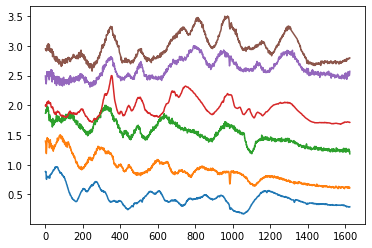

In [33]:
grid = []

for k in range(len(final_sequence)):
    grid.append(data[final_sequence[k]])
    print(final_sequence[k], data[final_sequence[k]])
    if k % 20 == 0:
        plt.plot(data[final_sequence[k]]+k/40)

plt.show()    

 ...]

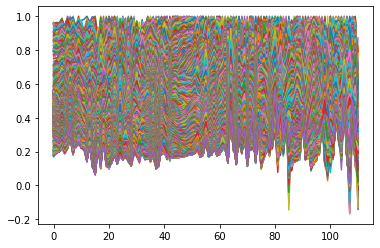

In [28]:
plt.plot(grid)

In [53]:
# get data from file
dm15_data = np.loadtxt("Filtered_Flux_Grid_dm15.txt")   

In [60]:
grid = []

# for spec in spec_array:
#     grid.append(spec.dm15)
#     print(spec.dm15)

for k in range(len(final_sequence)):
    grid.append(dm15_data[final_sequence[k]])
    print(final_sequence[k], dm15_data[final_sequence[k]])

93 1.01
7 1.37
237 0.84
486 1.25
238 0.84
239 0.84
236 0.84
86 1.6
457 0.96
468 1.03
467 1.03
565 1.37
466 1.01
186 0.86
235 0.84
55 1.27
465 1.01
464 1.01
463 1.01
387 0.81
349 1.3
386 0.97
54 1.1
348 1.41
350 1.32
146 1.08
145 1.08
148 1.27
279 1.26
143 1.17
345 1.08
144 1.32
147 1.27
344 1.08
346 1.08
52 0.9401482994217756
185 0.86
277 1.44
80 0.84
429 0.95
149 1.14
22 1.09
35 1.44
21 1.0
172 1.17
362 0.88
512 1.06
150 0.85
53 1.1
15 1.23
430 0.95
191 1.51
363 0.88
276 1.44
513 1.06
278 1.42
151 0.85
208 0.92
139 1.17
476 1.28
138 1.03
140 1.17
207 0.92
209 1.3
202 1.09
137 1.03
141 1.17
206 0.88
170 1.35
400 0.81
292 0.8
399 0.81
549 0.9793008064190225
142 1.17
500 1.4824250900307505
136 1.03
171 1.35
169 1.23
205 0.88
401 0.81
72 1.0342718078522968
188 0.87
173 1.17
384 1.06
116 1.14
550 1.0646065400190725
179 0.86
204 0.88
499 1.39
135 1.79
293 0.8
167 0.78
375 1.56
383 1.06
402 0.81
63 1.56
562 1.21
192 1.51
385 1.0
444 1.09
16 0.9244704601844673
166 0.78
168 1.23
291 1.07
435 1

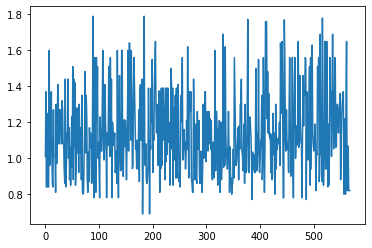

In [61]:
plt.plot(grid)

In [62]:
print(len(final_sequence))

568


In [63]:
# get data from file
vel_data = np.loadtxt("Filtered_Flux_Grid_velocity.txt")   

In [67]:
grid = []

for k in range(len(final_sequence)):
    if vel_data[final_sequence[k]] != 0:
        grid.append(vel_data[final_sequence[k]])
    print(final_sequence[k], vel_data[final_sequence[k]])

93 -13380.976013818037
7 -11119.009024216577
237 -14835.138188020346
486 0.0
238 -14835.138188020346
239 -14835.138188020346
236 -14835.138188020346
86 -11663.046711868228
457 -10717.048507643485
468 -15371.502671471706
467 -15371.502671471706
565 -11119.009024216577
466 -13380.976013818037
186 -10878.561871482476
235 -14835.138188020346
55 -11622.347206423943
465 -13380.976013818037
464 -13380.976013818037
463 -13380.976013818037
387 -9900.539823468924
349 -16695.032572427463
386 -8639.81150875224
54 -9729.451569927844
348 -10733.737322313613
350 0.0
146 -11027.461161229983
145 -11027.461161229983
148 -13226.55940430756
279 -10381.61196962748
143 -11965.694177089566
345 -13240.623615882701
144 -11873.687710340826
147 -13226.55940430756
344 -13240.623615882701
346 -13240.623615882701
52 -9493.44899898977
185 -10878.561871482476
277 -9093.06681893687
80 -13097.160731010335
429 -10912.3151785111
149 -10127.80339345301
22 -10599.527480192322
35 -11537.459419533161
21 -11905.355725052483
1

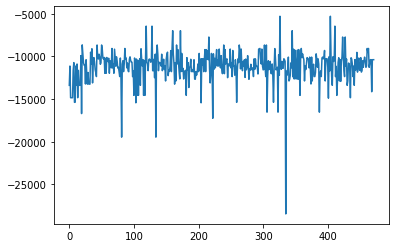

In [70]:
plt.plot(grid)

In [94]:
# get data from file
phase_data = np.loadtxt("Filtered_Flux_Grid_phase.txt")

In [95]:
grid = []

for k in range(len(final_sequence)):
    grid.append(phase_data[final_sequence[k]])
    print(final_sequence[k], phase_data[final_sequence[k]])

93 -8.619071222318118
7 -3.5786351688255262
237 -6.574988320813176
486 -3.263565122508554
238 -5.595124036960113
239 -4.595464515059888
236 -7.574647842713402
86 -6.745726953247645
457 -8.611838126754074
468 -8.58529411764489
467 -9.39901960784268
565 -8.568366302153139
466 -5.661946060531533
186 -2.639188348533873
235 -8.554512126566465
55 -6.562158220929435
465 -6.635403453390056
464 -7.608860846255808
463 -9.565708870684784
387 -2.9666974858492
349 -1.6092882322492141
386 -9.48060538735891
54 -1.1157908751552146
348 -2.4838796019135625
350 -6.0951997091673515
146 -2.558093930774331
145 -3.518972448279186
148 -3.4399680862110102
279 -6.016153286929695
143 -3.09920324608626
345 -5.428008045900055
144 -1.971118092550861
147 -4.353755666953764
344 -6.418882095899559
346 -3.45616868639585
52 -5.382178668444613
185 -3.644781219468787
277 -2.942404929558961
80 -2.386288101793762
429 -3.5424245403554404
149 -1.203208556149903
22 -3.1940193812793605
35 -1.2610242015152597
21 -8.1897627965057

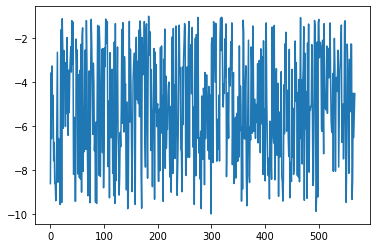

In [96]:
plt.plot(grid)

(array([  1.,   0.,   0.,   2.,   1.,  25.,  60., 308.,  67.,   8.]),
 array([-28457.50472103, -26139.88349588, -23822.26227073, -21504.64104558,
        -19187.01982043, -16869.39859527, -14551.77737012, -12234.15614497,
         -9916.53491982,  -7598.91369467,  -5281.29246952]),
 <a list of 10 Patch objects>)

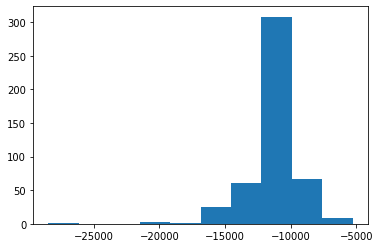

In [72]:
plt.hist(grid)

In [73]:
print(grid)

[-13380.976013818037, -11119.009024216577, -14835.138188020346, -14835.138188020346, -14835.138188020346, -14835.138188020346, -11663.046711868228, -10717.048507643485, -15371.502671471706, -15371.502671471706, -11119.009024216577, -13380.976013818037, -10878.561871482476, -14835.138188020346, -11622.347206423943, -13380.976013818037, -13380.976013818037, -13380.976013818037, -9900.539823468924, -16695.032572427463, -8639.81150875224, -9729.451569927844, -10733.737322313613, -11027.461161229983, -11027.461161229983, -13226.55940430756, -10381.61196962748, -11965.694177089566, -13240.623615882701, -11873.687710340826, -13226.55940430756, -13240.623615882701, -13240.623615882701, -9493.44899898977, -10878.561871482476, -9093.06681893687, -13097.160731010335, -10912.3151785111, -10127.80339345301, -10599.527480192322, -11537.459419533161, -11905.355725052483, -12353.295180737878, -8652.317249471751, -10180.174299248438, -10296.517142888733, -9729.451569927844, -10038.479289215215, -10912.

In [77]:
grid=[]

for k in range(len(final_sequence)):
    grid.append(vel_data[final_sequence[k]])
#     print(final_sequence[k], vel_data[final_sequence[k]])

for i in range(len(grid)):
    if grid[i] < -25000:
        print(i, grid[i])

395 -28457.50472103146


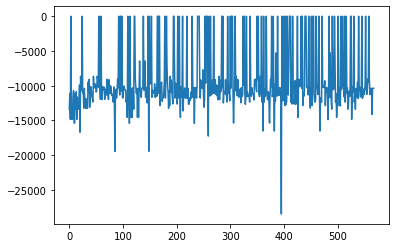

In [78]:
plt.plot(grid)

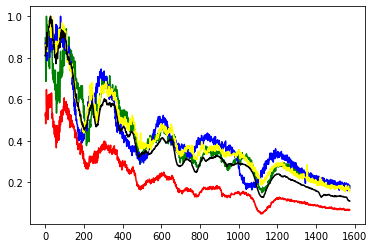

In [93]:
plt.plot(xaxis, data[395], color='red')
plt.plot(xaxis, data[200], color='green')
plt.plot(xaxis, data[300], color='blue')
plt.plot(xaxis, data[400], color='yellow')
plt.plot(xaxis, data[500], color='black')

In [87]:
print()

-11385.706127922447
